# Chapter.1 Artificial Intelligence

## 教師なし学習

### インポート

In [1]:
import numpy as np
import pandas as pd
from pylab import plt, mpl
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

`pylab`について：https://queirozf.com/entries/matplotlib-pylab-pyplot-etc-what-s-the-different-between-these
`pyplot`と同じ`matplotlib`のモジュールであるが、現在は使用非推奨となっている。

### 描画設定

In [2]:
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'
np.set_printoptions(precision=4,
                    suppress=True)

### クラスタリング用データセットの作成

In [3]:
x, y = make_blobs(n_samples=100,
                  centers=4,
                  random_state=500,
                  cluster_std=1.25)

`sklearn.datasets.make_brobs`：https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html
クラスタリング用の等方性ガウス分布の塊（blob）を作成することができる。

### モデル定義

In [4]:
model = KMeans(n_clusters=4,
               random_state=0)

KMeans：https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

### モデル学習

In [5]:
model.fit(x)

KMeans(n_clusters=4, random_state=0)

### 予測

In [6]:
y_ = model.predict(x)
y_

array([3, 3, 1, 2, 1, 1, 3, 2, 1, 2, 2, 3, 2, 0, 0, 3, 2, 0, 2, 0, 0, 3,
       1, 2, 1, 1, 0, 0, 1, 3, 2, 1, 1, 0, 1, 3, 1, 3, 2, 2, 2, 1, 0, 0,
       3, 1, 2, 0, 2, 0, 3, 0, 1, 0, 1, 3, 1, 2, 0, 3, 1, 0, 3, 2, 3, 0,
       1, 1, 1, 2, 3, 1, 2, 0, 2, 3, 2, 0, 2, 2, 1, 3, 1, 3, 2, 2, 3, 2,
       0, 0, 0, 3, 3, 3, 3, 0, 3, 1, 0, 0], dtype=int32)

### 描画

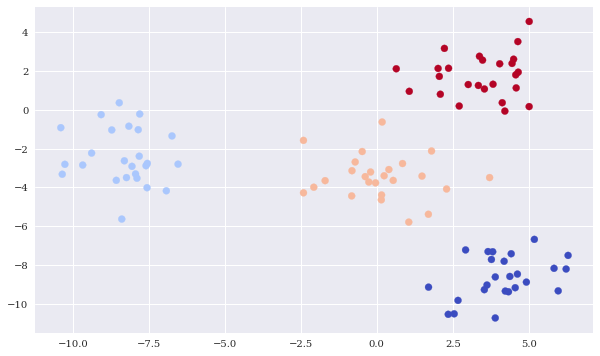

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(x[:, 0],
            x[:, 1],
            c=y_,
            cmap='coolwarm')

## 強化学習

### 状態空間の設定(1=表、0=裏)

In [8]:
ssp = [1, 1, 1, 1, 0]

### 行動空間の設定(1=表に賭ける、0=裏に賭ける)

In [9]:
asp = [1, 0]

### 賭け函数の定義

In [10]:
def epoch():
    tr = 0
    for _ in range(100):
        a = np.random.choice(asp)
        s = np.random.choice(ssp)
        if a == s:
            tr += 1
    return tr

### 報酬計算

In [11]:
rl = np.array([epoch() for _ in range(15)])
rl

array([51, 54, 50, 49, 57, 48, 51, 50, 53, 50, 46, 52, 50, 56, 49])

### 報酬平均

In [12]:
rl.mean()

51.06666666666667

### 状態空間の設定(1=表、0=裏)

In [13]:
ssp = [1, 1, 1, 1, 0]

### 賭け函数の定義

上の`epoch`と異なるのは、函数内で行動空間を定義すること、そして1アクションごとに行動空間に表・裏の結果を追加していくこと。
これにより、強化学習を近似している。

In [14]:
def epoch():
    tr = 0
    asp = [0, 1]
    for _ in range(100):
        a = np.random.choice(asp)
        s = np.random.choice(ssp)
        if a == s:
            tr += 1
        asp.append(s)
    return tr

### 報酬計算

In [15]:
rl = np.array([epoch() for _ in range(15)])
rl

array([60, 67, 58, 50, 68, 73, 68, 77, 68, 63, 71, 69, 62, 63, 70])

### 報酬平均

In [16]:
rl.mean()

65.8

## 教師あり学習

### 最小二乗回帰

### 教師函数定義

In [17]:
def f(x):
    return 2 * x ** 2 - x ** 3 / 3

### `x`の定義

In [18]:
x = np.linspace(-2,
                4,
                25)
x

array([-2.  , -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,
        0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,
        2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ])

`np.linspace`：https://numpy.org/doc/stable/reference/generated/numpy.linspace.html
使い方：https://note.nkmk.me/python-numpy-arange-linspace/

### `y=f(x)`の計算

In [19]:
y = f(x)
y

array([10.6667,  7.9115,  5.625 ,  3.776 ,  2.3333,  1.2656,  0.5417,
        0.1302,  0.    ,  0.1198,  0.4583,  0.9844,  1.6667,  2.474 ,
        3.375 ,  4.3385,  5.3333,  6.3281,  7.2917,  8.1927,  9.    ,
        9.6823, 10.2083, 10.5469, 10.6667])

### 描画

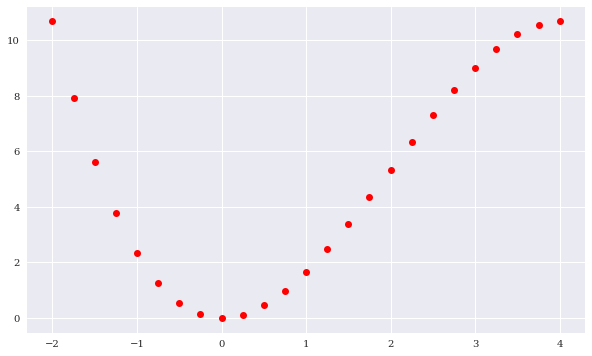

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(x,
         y,
         'ro')

### `beta`の算出

In [21]:
beta = np.cov(x,
              y,
              ddof=0)[0, 1] / np.var(x)
beta

1.0541666666666667

### `alpha`の算出

In [22]:
alpha = y.mean() - beta * x.mean()
alpha

3.8625000000000003

### 最小二乗法による予測

In [23]:
y_ = alpha + beta * x

### `MSE`算出

In [24]:
MSE = ((y - y_) ** 2).mean()
MSE

10.721953125

### 元データと予測の描画

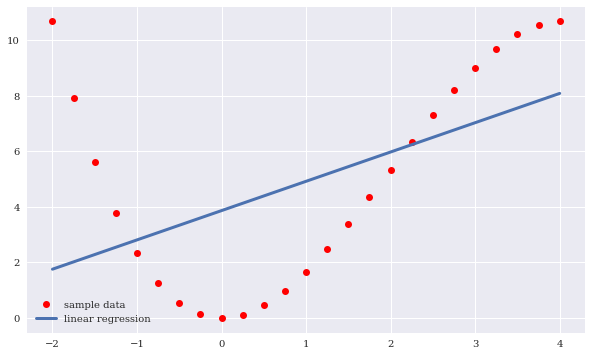

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(x,
         y,
         'ro',
         label='sample data')
plt.plot(x,
         y_,
         lw=3.0,
         label='linear regression')
plt.legend();

### 多項式による予測と描画

deg=1 | MSE=10.72195
deg=2 | MSE=2.31258
deg=3 | MSE=0.00000


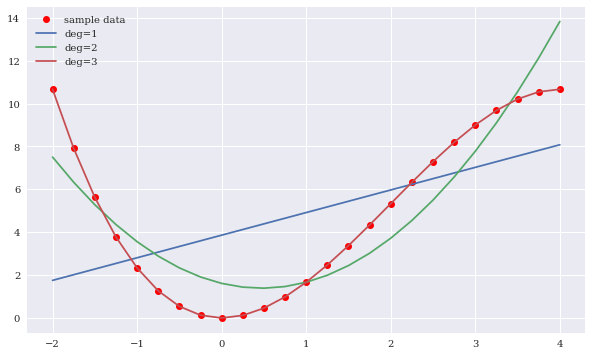

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(x,
         y,
         'ro',
         label='sample data')
for deg in [1, 2, 3]:
    reg = np.polyfit(x,
                     y,
                     deg=deg)
    y_ = np.polyval(reg,
                    x)
    MSE = ((y - y_) ** 2).mean()
    print(f'deg={deg} | MSE={MSE:.5f}')
    plt.plot(x,
             np.polyval(reg,
                        x),
             label=f'deg={deg}')
plt.legend();

`np.polyfit`：https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html
`np.polyval`：https://numpy.org/doc/stable/reference/generated/numpy.polyval.html

### 係数表示

In [27]:
reg

array([-0.3333,  2.    ,  0.    , -0.    ])